<a href="https://colab.research.google.com/github/chernoskutov1989dv/Prediction-of-clothing-type-using-neural-networks/blob/master/prediction_of_clothing_type_using_neural_networks_fashion_mnist_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Вручную пропишем имена классов

In [ ]:

class_names = ["T-shirt/top" , "Trouser", "Pulover" , "Dress" , "Coat", "Sandal" , "Shirt" , "Sneaker" , "Bag", "Ankle boot"]    

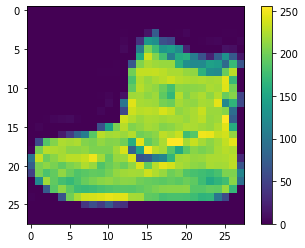

In [ ]:

plt.figure()
plt.imshow(x_train[0]) #  в [] cкобки вставляем индекс от 0 до 59999.
plt.colorbar()
plt.grid(False) 


Делаем нормализацию

In [ ]:

x_train = x_train/255

x_test = x_test/255

В обучающей (x_train) выборке -60 000 изображений. В тестовой(x_test) - 10 000 изображений.

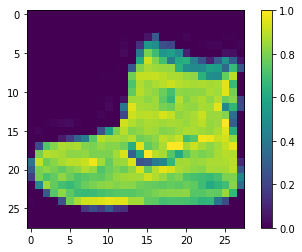

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

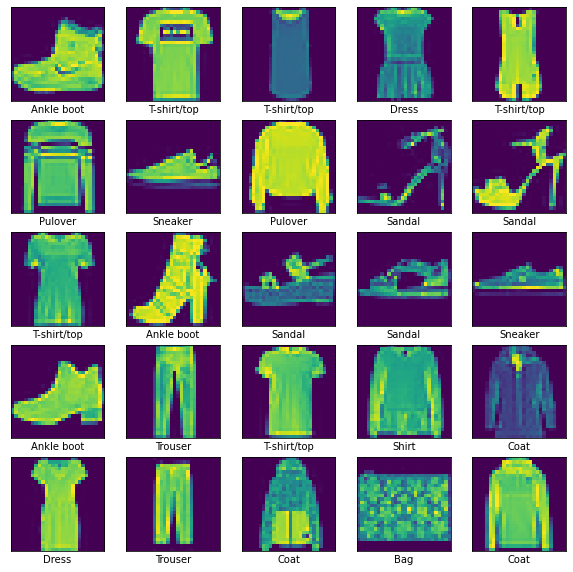

In [ ]:
plt.figure(figsize= (10, 10))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow( x_train[i])
  plt.xlabel(class_names[y_train[i]])



In [ ]:
model = keras.Sequential ([
                           keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(128, activation = "relu"),
                           keras.layers.Dense(10, activation = "softmax")

])

Для задачи классификации указываем в качестве функции потерь sparse_categorical_crossentropy

In [ ]:

model.compile(optimizer = tf.keras.optimizers.SGD(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7228 - accuracy: 0.7667
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5119 - accuracy: 0.8250
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8375
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4449 - accuracy: 0.8465
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4271 - accuracy: 0.8520
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4119 - accuracy: 0.8571
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4006 - accuracy: 0.8604
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3901 - accuracy: 0.8651
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8669
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.373

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test accuracy: ", test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8577
Test accuracy:  0.857699990272522


Всё, теперь модель обучена. И мы можем предсказывать то, что нарисовано на рисунках. Предсказываем на тех рисунках, на которых наша модель обучалась(x_train - 60000 рисунков)

In [ ]:
predictions = model.predict (x_train)
predictions[1] # в индекс можем задавать значения от 0 до 59999


1875/1875 [==============================] - 3s 1ms/step


array([9.9112940e-01, 1.2959131e-07, 9.9540142e-05, 7.8810495e-05,
       1.2372202e-07, 6.4128616e-12, 8.6852005e-03, 3.8626458e-10,
       6.8381264e-06, 6.1278094e-10], dtype=float32)

С вероятностью 99,11%  (array([9.9112940e-01 см. выше) изображение соответствует нулевому классу (отсчет начинается с нуля в python)

In [ ]:
np.argmax(predictions[1])

0

Проверим предсказанное:

In [ ]:
y_train[1]

0

Реальный ответ совпадает с предсказзанным моделью. Отлично.

In [ ]:
class_names[np.argmax(predictions[1])]

'T-shirt/top'

Напечатаем тип одежды

И отразим далее на графике

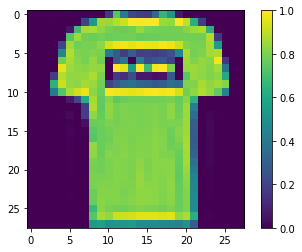

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

